# Árboles de decisión 

## Regresión

A diferencia de la tarea de clasificación cuando se realiza regresión se busca que el sistema sea capaz de estimar una salida numérica para cualquier valor de entrada.

Al igual que en la clasificación los nodos del árbol representarán reglas o condiciones de los valores de los datos de entrada, cada nodo se abrirá en dos ramas que llevarán a otros nodos o a las hojas de los árboles.

Las hojas de los árboles representarán los valores predichos para las entradas dadas. Esta salida será una estimación del valor resultante.


# Algoritmo 

- Seleccionar el mejor atributo segun las <b>medidas de selección de atributos </b>
- Convertir el atributo en un nodo y dividir el conjunto en subconjuntos
- Repetir el proceso recursivamente para cada subconjunto hasta que:
    - Todos los ejemplos pertenecen al mismo valor
    - No quedan más atributos
    - No hay más instancias
    
# Medidas de selección de atributos

La medidas de selección de atributos son heurísticas para seleccionar el mejor criterio de separacióna de los dos. Provee a cada atributo con un valor o ranking, el atributo con mejor puntaje será el que se seleccionará como atributo de separación. 

## Error medio cuadrado (MSE)

El algoritmo selecciona un valor y dividirá el conjunto en dos subconjuntos calculando para cada uno el MSE. El valor con resultados con menor MSE será el elegido.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53ab02a5a1847aa3ff5c6eb69b4023bfb73655f5">

Para cada atributo, existirán muchos posibles valores por los cuál es posible dividir por lo que es necesario verificar para cada atributo y cada valor posible de este atributo cuál es el MSE.


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [4]:
icecream = pd.read_csv("icecreamdata.csv")
icecream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
data = icecream.values[:,0]
data_columns = list(icecream.columns.values[:1])
target= icecream.values[:,1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [7]:
reg = DecisionTreeRegressor( max_depth=1)
reg = reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred = reg.predict(X_test.reshape(-1,1))

In [8]:
error =metrics.mean_squared_error(y_test,y_pred)
print(error)

11868.61341177521


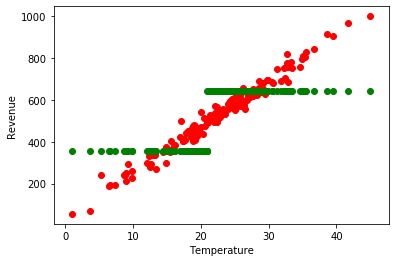

In [9]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

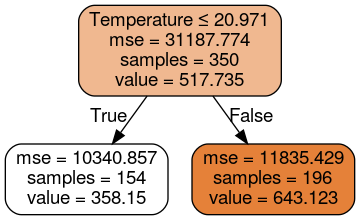

In [10]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())